# Plot forces for flow past cylinder
## grid0 case
## All versions of code/grid

In [1]:
%%capture
import sys
sys.path.insert(1, '../utilities')
import litCdData
import numpy as np
import matplotlib.pyplot as plt

In [2]:
# Basic problem parameters
D     = 6            # Cylinder diameter
U     = 20           # Freestream velocity
Lspan = 24           # Spanwise length
A     = D*Lspan      # frontal area
rho   = 1.225        # density
Q     = 0.5*rho*U*U  # Dynamic head
vis   = 1.8375e-5    # viscosity
ReNum = rho*U*D/vis  # Reynolds number

avgt = [160.0, 260.0] # Average times
saveinfo = False
alldata = []

In [3]:
# Load the force data (old grid, old code)
force01  = np.loadtxt('forces01.dat', skiprows=1)
force02  = np.loadtxt('forces02.dat', skiprows=1)
forcedat = np.vstack((force01, force02))
t        = forcedat[:,0]*U/D  # Non-dimensional time
alldata.append(['Old BC, Old code', t, forcedat])

In [4]:
# Old grid, new code
forcedat = np.loadtxt('forcesoldgridnewcode.dat', skiprows=1)
t        = forcedat[:,0]*U/D  # Non-dimensional time
alldata.append(['Old BC, New code', t, forcedat])

In [5]:
# New grid, old code
forcedat = np.loadtxt('forcesnewgridoldcode.dat', skiprows=1)
t        = forcedat[:,0]*U/D  # Non-dimensional time
alldata.append(['New BC, old code', t, forcedat])

In [6]:
# New grid, new code
forcedat = np.loadtxt('forcesnewgridnewcode.dat', skiprows=1)
t        = forcedat[:,0]*U/D  # Non-dimensional time
alldata.append(['New BC, new code', t, forcedat])

In [7]:
# Calculate time average
def timeaverage(time, f, t1, t2):
    filt = ((time[:] >= t1) & (time[:] <= t2))
    # Filtered time
    t     = time[filt]
    # The total time
    dt = np.amax(t) - np.amin(t)
    #  Filtered field
    filtf = f[filt]
     # Compute the time average as an integral
    avg = np.trapz(filtf, x=t, axis=0) / dt
    return avg

In [18]:
#print(alldata)
print('%30s   %10s %10s'%("Case", "avgCd", "avgCl"))
for run in alldata:
    label = run[0]
    t     = run[1]
    forcedat = run[2]
    Cd = (forcedat[:,1]+forcedat[:,4])/(Q*A)
    Cl = (forcedat[:,2]+forcedat[:,5])/(Q*A)
    # Calculate averaged Cp, Cd
    avgCd = timeaverage(t, Cd, avgt[0], avgt[1])
    avgCl = timeaverage(t, Cl, avgt[0], avgt[1])
    print('%30s   %10f %10f'%(label, avgCd, avgCl))
    #print("Avg Cd = %f"%avgCd)
    #%print("Avg Cl = %f"%avgCl)

                          Case        avgCd      avgCl
              Old BC, Old code     0.557448   0.015747
              Old BC, New code     0.531194  -0.020163
              New BC, old code     0.532598  -0.003509
              New BC, new code     0.371748   0.005388


## Plot Lift and Drag coefficients

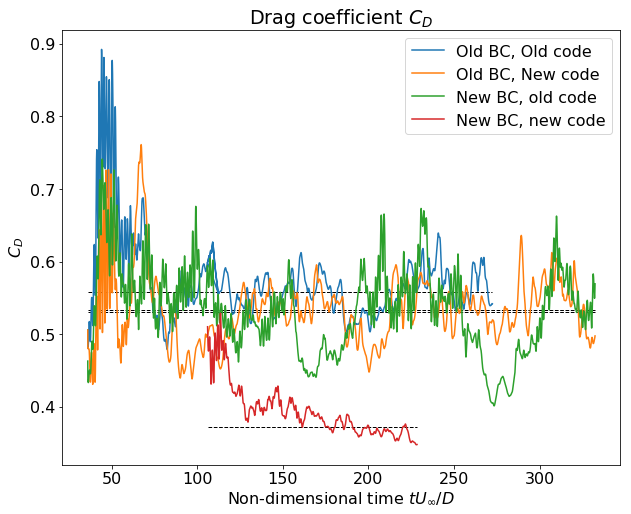

In [9]:
plt.rc('font', size=16)
plt.figure(figsize=(10,8))

for run in alldata:
    label = run[0]
    t     = run[1]
    forcedat = run[2]
    Cd = (forcedat[:,1]+forcedat[:,4])/(Q*A)
    Cl = (forcedat[:,2]+forcedat[:,5])/(Q*A)
    # Calculate averaged Cp, Cd
    avgCd = timeaverage(t, Cd, avgt[0], avgt[1])
    avgCl = timeaverage(t, Cl, avgt[0], avgt[1])
    #print('%30s   %f %f'%(label, avgCd, avgCl))
    
    plt.plot(t,Cd, label=label)
    plt.hlines(avgCd, np.min(t), np.max(t), linestyles='dashed', linewidth=1)
plt.xlabel(r'Non-dimensional time $t U_{\infty}/D$');
plt.legend()
plt.ylabel('$C_D$')
plt.title('Drag coefficient $C_D$');

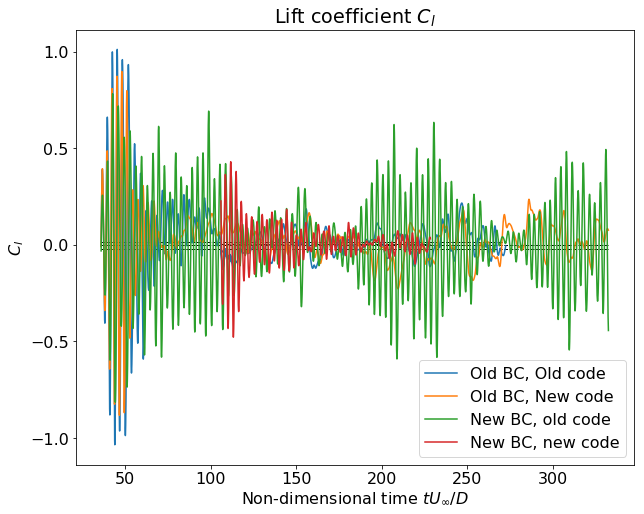

In [10]:
plt.figure(figsize=(10,8))

for run in alldata:
    label = run[0]
    t     = run[1]
    forcedat = run[2]
    Cd = (forcedat[:,1]+forcedat[:,4])/(Q*A)
    Cl = (forcedat[:,2]+forcedat[:,5])/(Q*A)
    # Calculate averaged Cp, Cd
    avgCd = timeaverage(t, Cd, avgt[0], avgt[1])
    avgCl = timeaverage(t, Cl, avgt[0], avgt[1])
    plt.plot(t,Cl, label=label)
    plt.hlines(avgCl, np.min(t), np.max(t), linestyles='dashed', linewidth=1)
plt.xlabel(r'Non-dimensional time $t U_{\infty}/D$');
plt.ylabel('$C_l$')
plt.title('Lift coefficient $C_l$');
plt.legend()

## Plot Cd versus Reynolds number

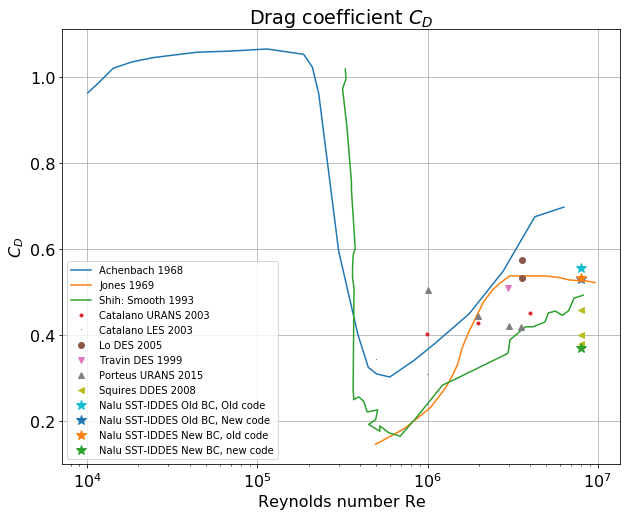

In [16]:
plt.figure(figsize=(10,8))
litCdData.plotEXP()
litCdData.plotCFD()

for run in alldata:
    label = run[0]
    t     = run[1]
    forcedat = run[2]
    Cd = (forcedat[:,1]+forcedat[:,4])/(Q*A)
    Cl = (forcedat[:,2]+forcedat[:,5])/(Q*A)
    # Calculate averaged Cp, Cd
    avgCd = timeaverage(t, Cd, avgt[0], avgt[1])
    avgCl = timeaverage(t, Cl, avgt[0], avgt[1])
    plt.semilogx(ReNum, avgCd, '*',   ms=10, label='Nalu SST-IDDES '+label)
plt.grid()
plt.legend(fontsize=10)

plt.xlabel(r'Reynolds number Re');
plt.ylabel('$C_D$')
plt.title('Drag coefficient $C_D$');

In [12]:
# Write the YAML file these averaged quantities
import yaml
if saveinfo:
    savedict={'Re':float(ReNum), 'avgCd':float(avgCd), 'avgCl':float(avgCl)}
    f=open('istats.yaml','w')
    f.write('# Averaged quantities from %f to %f\n'%(avgt[0], avgt[1]))
    f.write('# Grid: grid0\n')
    f.write(yaml.dump(savedict, default_flow_style=False))
    f.close()